# Wiki Networking

### Introduction

In this notebook, we will map out a social network created from Wikipedia articles. Web crawling and text mining tools are available on the [Wiki Networking - Text Mining Tools](./Wiki%20Networking%20-%20Text%20Mining%20Tools.ipynb) notebook. To begin, we will need to define which data file we are using and the name of our output image file.

In [1]:
data_file = "mcu_network.json"
output_file = "mcu_network.png"
minimum_links = 2

In [2]:
def load_dict(filename):
    import json
    with open(filename, 'r') as f:
        data = json.load(f)
        return data
    
network_data = load_dict(data_file)
print network_data

{u'House of M': {u'Iron Man': 4, u'Hawkeye (comics)': 2, u'Luke Cage': 3, u'Spider-Ham': 1, u'Iron Fist (comics)': 1, u'Spider-Man': 5, u'Hulk (comics)': 1, u'Daredevil (Marvel Comics character)': 1, u'Amalgam Comics': 1, u'Conan (Marvel Comics)': 1, u'Cloak and Dagger (comics)': 1, u'Marvel Comics': 5, u'Angela (comics)': 1, u'Mojo (comics)': 1, u'Marvelman': 1, u'Maria Hill': 1}, u'Claire Temple': {u'Luke Cage': 4, u'Iron Fist (comics)': 3, u'Spider-Man': 1, u'Daredevil (Marvel Comics character)': 1, u'Claire Temple (Marvel Cinematic Universe)': 2, u'Marvel Comics': 3}, u'Trevor Slattery': {u'Phil Coulson': 1, u'Iron Man': 2, u'Erik Selvig': 1, u'Claire Temple (Marvel Cinematic Universe)': 1}, u'Black Widow (Natasha Romanova)': {u'Vision (Marvel Comics)': 1, u'Iron Man': 5, u'Maria Hill': 3, u'Hawkeye (comics)': 9, u'Mockingbird (Marvel Comics)': 3, u'Jeffrey Mace': 1, u'Nick Fury': 7, u'Sharon Carter': 4, u'Al MacKenzie': 1, u'Marvel Comics': 3, u'Daredevil (Marvel Comics character)

### `matplotlib` and `networkx`

We need to import `matplotlib` (the plotting tool for Python) and `networkx` (a node graphing tool.) 

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx

### Adding links to the graph

We begin by creating a `graph` object. `networkx` automatically adds nodes when you add edges. We iterate through each article's data in the `network_data` dictionary. The `add_edge` method requires a "from" and "to" parameter. It optionally accepts a `weight`.

In [4]:
graph = nx.DiGraph()

for article, links in network_data.items():
    for link, num_links in links.items():
        if num_links >= minimum_links:
            graph.add_edge(article, link, weight=num_links)

### Graphing it!

This is all we need to graph the network. It's somewhat unreadable with its default settings, so later we will add some options to make it readable.

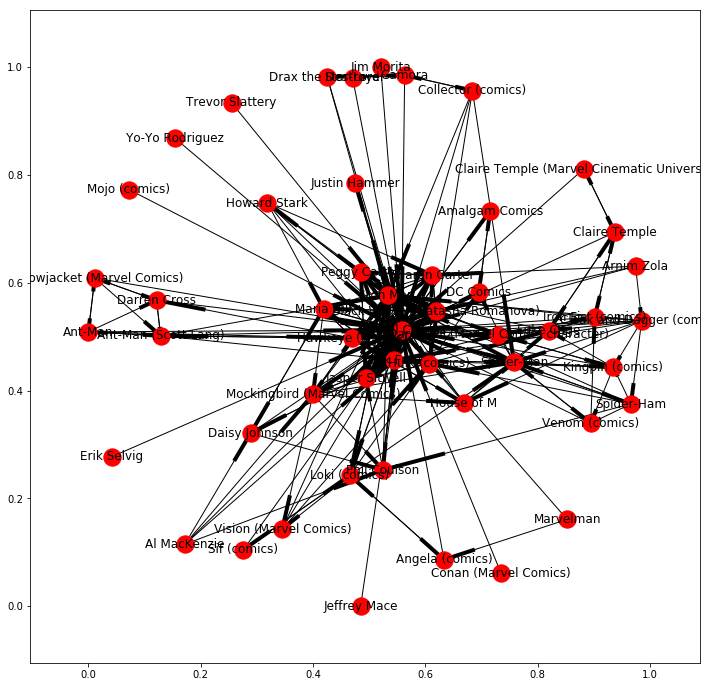

In [5]:
plt.figure(1, figsize=(12, 12))
nx.draw_networkx(graph)
plt.show()

### Let's make it look better

The graph is very difficult to read. Let's do a few things to make it prettier, such as coloring and sizing the nodes and the edges between them. First, we need to ask the graph for the weights of all the edges it knows about. We also need to ask the graph to compute all of the degrees of the nodes. We multiply the degrees by a scale factor because we will use the degrees as the node size. (A node with degree of 1 will mean the node will be too small to see if we kept its size at 1!) We can also use additional `networkx` options to change how the graph is displayed, such as the layout and color maps.

Finally, we will render this new graph in high resolution to an image file and then display it. It can take quite a while to render, so be patient!

In [7]:
weights = [ d["weight"] for (u, v, d) in graph.edges(data=True)]
degrees = [ degree * 5 for degree in nx.degree(graph).values() ]

print "Rendering hi-resolution image..."

fig = plt.figure(1, figsize=(12, 9), dpi=1200)
nx.draw_networkx(graph, \
                 pos=nx.spring_layout(graph), \
                 arrows=False, \
                 node_size=degrees, \
                 node_color=degrees, \
                 edge_color=weights, \
                 cmap=plt.cm.viridis, \
                 edge_cmap=plt.cm.Reds, \
                 font_size=2)

print "Saving hi-resolution image to " + output_file

fig.savefig(output_file)

print "Finished rendering hi-resolution image to " + output_file
print "Displaying graph..."

Rendering hi-resolution image...
Saving hi-resolution image to mcu_network.png
Finished rendering hi-resolution image to mcu_network.png
